In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

0) Finish the implementation of false positon method. Use it to find the solution for $\sin(x) + 1 = x$ do it 20 times.

1) Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

In [3]:
def f(x):
    return math.exp(-x)-x
def check_sign(yo,yt):
    return f(yo) * f(yt) < 0

def pass_error(x,limit):
    return math.fabs(f(x)) < limit

def find_x(x0,x1,limit):
    x = (x0+x1)/2
#     print f(x)
    if(pass_error(x,limit)):
        return x   
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)

ans= find_x(0,1.,10**(-6))
print ans


0.567143440247


-1 actually give more value than 0

2) Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

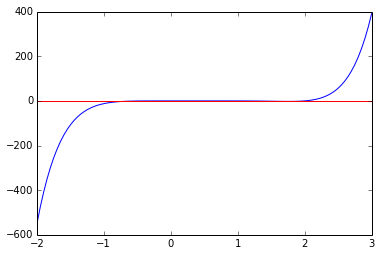

In [4]:
xs = np.linspace(-2,3,100)
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7
# def nf(x):
#     return (0.000216747 + 0.0977383*x**2 - 0.664685*x**3 + \
#             2.40773*x**4 - 4.46766*x**5 + 3.7091*x**6 - x**7)/0.0072868
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.axhline(0,c='r')

(-1e-05, 1e-05)

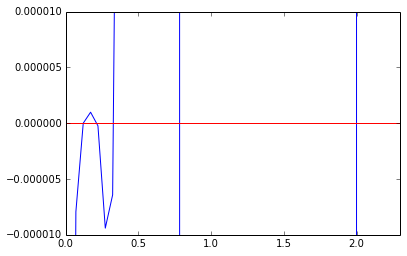

In [5]:
plt.plot(xs,ys)
plt.axhline(0,c='r')
plt.xlim(0,2.3)
plt.ylim(-1e-5,1e-5)

In [6]:
def pass_error(x,limit):
    return math.fabs(f(x)) < limit

def find_x(x0,x1,limit):
    x = (x0+x1)/2
    if(pass_error(x,limit)):
        return x   
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)
ans_lst = []

ans= find_x(0.1,0.15,1e-6)
# print ans
ans_lst.append(ans)

ans= find_x(0.15,0.25,1e-6)
# print ans
ans_lst.append(ans)

ans= find_x(0.333,0.5,1e-6)
# print ans
ans_lst.append(ans)

ans= find_x(0.5,1,1e-6)
# print ans
ans_lst.append(ans)

# ans = find_x(1,2.5,1e-6)
# # print ans
# ans_lst.append(ans)



In [7]:
print ans_lst

[0.125, 0.225, 0.3343046875, 0.785400390625]


2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

(-2.5, 0.1)

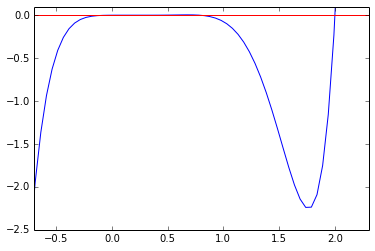

In [8]:
plt.plot(xs,ys)
plt.axhline(0,c='r')
plt.xlim(-0.7,2.3)
plt.ylim(-2.5,0.1)

(-1e-05, 1e-05)

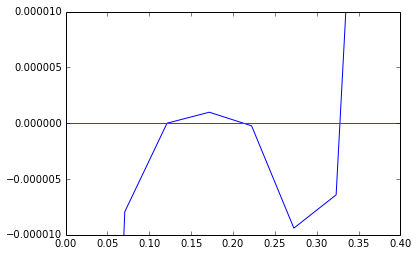

In [9]:
plt.plot(xs,ys)
plt.axhline(0,c='r')
plt.xlim(0,0.4)
plt.ylim(-1e-5,1e-5)

(-0.01, 0.01)

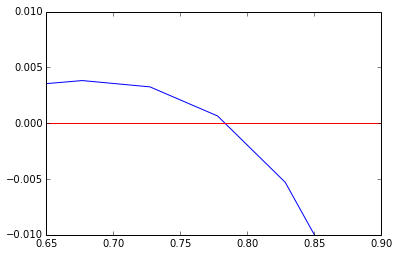

In [10]:
plt.plot(xs,ys)
plt.axhline(0,c='r')
plt.xlim(0.65,0.9)
plt.ylim(-1e-2,1e-2)

In [11]:
def df(x):
    return  0.0072868 - 0.0977383*2*x + 0.664685*3*x**2 - \
            2.40773*4*x**3 + 4.46766*5*x**4 - 3.7091*6*x**5 + 7*x**6
    
def ddf(x):
    return  - 2*0.0977383 + 3*2*0.664685*x - 4*3*2.40773*x**2 + 5*4*4.46766*x**3 - 6*5*3.7091*x**4 + 7*6*x**5

def check_sign(yo,yt):
    return df(yo) * df(yt) < 0
def pass_error(x,limit):
    return np.abs(df(x)) <= limit

def find_dx(x0,x1,limit):
    x = (x0+x1)/2.
    if(pass_error(x,limit)):
        return x   
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)

i = 0
minmax = []
while i < len(ans_lst)-1:
    minmax.append(find_dx(ans_lst[i],ans_lst[i+1],1e-6))
    i+=1
print minmax

[0.19140625, 0.2971581726074219, 0.6817810865044593]


2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

3) Suppose you are saving up your money for your new phone which costs 15000 Baht.  You save 1k every month and spend the rest. The `yearly` interest rate is 2% the interest is paid continously(you get interest paid to your account every microsecond). How long do you need to wait. Your answer should not be more than one second away from the real answer.

In [12]:
year_micro = 12*30*24*60*60*1e6
month_micro = 30*24*60*60*1e6
print year_micro,month_micro



3.1104e+13 2.592e+12


Money after 1 micro = 1.02(1000)

Money after 2 micro = 1.02(1.02(1000))

Money after n micro = $1.02^n(1000)$

4) Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a function is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

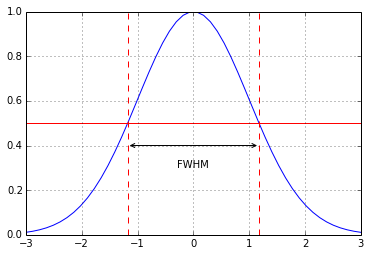

In [13]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

4.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

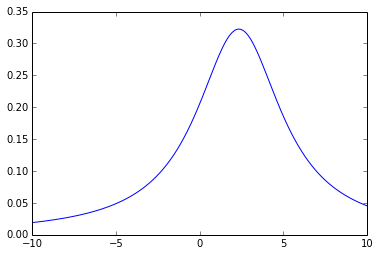

In [14]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)
x = np.linspace(-10,10,200)
y = [f(xx) for xx in x]
plt.plot(x,y)

In [15]:
def df(x,gamma=3.1):
    mu = 2.345
    return -(gamma*2*(x-mu))/(((x-mu)**2+gamma**2)**2)
def check_sign(yo,yt):
    return df(yo) * df(yt) < 0

def pass_error(x,limit):
    return np.abs(df(x)) < limit

def find_x(x0,x1,limit):
    x = (x0+x1)/2
#     print df(x)
    if(pass_error(x,limit)):
        return x   
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)

maxy = f(find_x(0,5.,1e-4))
midy = maxy/2.
print midy


0.161290296356


In [16]:
def f(x, gamma=3.1,y = midy):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2) - y
def check_sign(yo,yt):
    return f(yo) * f(yt) < 0

def pass_error(x,limit):
    return np.abs(f(x)) < limit
def find_x(x0,x1,limit):
    x = (x0+x1)/2
#     print f(x)
    if(pass_error(x,limit)):
        return x   
    else:
        if(check_sign(x,x0)):
            return find_x(x0,x,limit)
        else:
            return find_x(x,x1,limit)
m1 = find_x(-3,maxy,1e-4)
m2 = find_x(maxy,7,1e-4)
print m2-m1


6.19942353633


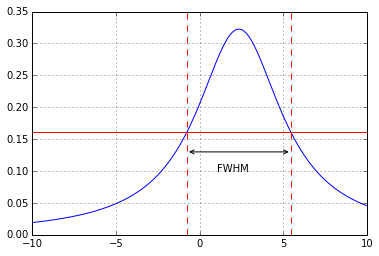

In [17]:
plt.plot(x,y)
plt.axhline(midy, color='red')
plt.axvline(m1,color='red',linestyle='dashed')
plt.axvline(m2,color='red',linestyle='dashed')
plt.grid()
plt.annotate(
    '', xy=(m1, 0.13), xycoords='data',
    xytext=(m2, 0.13), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(2,0.10,'FWHM',horizontalalignment ='center')


4.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

In [37]:
print f(1.0, gamma=0.2) # you may find this useful

0.108165114047
